In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
from keras.models import Sequential
from keras.layers import Flatten,Dense,Conv2D, MaxPool2D,Dropout
from keras.preprocessing.image import ImageDataGenerator

In [0]:
img_width=64
img_height=64

In [0]:
datagen=ImageDataGenerator(rescale=1/255.0,validation_split=0.2)

In [11]:
train_data=datagen.flow_from_directory(directory='/content/Malaria-Classification-Using-CNN/malaria-dataset',target_size=(img_width, img_height), class_mode='binary',batch_size=16,subset='training')

Found 22048 images belonging to 2 classes.


In [12]:
test_data=datagen.flow_from_directory(directory='/content/Malaria-Classification-Using-CNN/malaria-dataset', target_size=(img_width, img_height), class_mode='binary', batch_size=16, subset='validation')

Found 5510 images belonging to 2 classes.


In [0]:
model=Sequential()

model.add(Conv2D(16, (3,3), input_shape=(img_width, img_height, 3), activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))


model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))


model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

In [0]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [46]:
model.fit_generator(generator=train_data,steps_per_epoch=len(train_data),epochs=5,validation_data=test_data,validation_steps=len(test_data))

Epoch 1/5
1378/1378 [==============================] - 111s 81ms/step - loss: 0.3877 - acc: 0.8486 - val_loss: 0.2299 - val_acc: 0.9258
Epoch 2/5
1378/1378 [==============================] - 110s 80ms/step - loss: 0.2276 - acc: 0.9247 - val_loss: 0.1959 - val_acc: 0.9348
Epoch 3/5
1378/1378 [==============================] - 111s 80ms/step - loss: 0.2034 - acc: 0.9316 - val_loss: 0.1804 - val_acc: 0.9336
Epoch 4/5
1378/1378 [==============================] - 111s 80ms/step - loss: 0.1916 - acc: 0.9331 - val_loss: 0.1759 - val_acc: 0.9358
Epoch 5/5
1378/1378 [==============================] - 111s 80ms/step - loss: 0.1839 - acc: 0.9386 - val_loss: 0.1725 - val_acc: 0.9383


In [47]:
model.history.history

{'acc': [0.8486484034833092,
  0.9247097242380261,
  0.931649129172714,
  0.9331458635703919,
  0.9386338896952104],
 'loss': [0.3876861241187884,
  0.22759301501430343,
  0.20338651234438138,
  0.19159953331463958,
  0.18393553729292075],
 'val_acc': [0.9257713248638838,
  0.9348457350272232,
  0.9335753176043557,
  0.9357531760435571,
  0.9382940108676571],
 'val_loss': [0.22988593361987825,
  0.1958567466444848,
  0.18035221778654142,
  0.175862265267357,
  0.17249591261851593]}

In [0]:
def plot_learningCurve(history, epoch):
  # Plot training & validation accuracy values
  
  epoch_range = range(1, epoch+1)
  
  # Plot training & validation loss values
  plt.plot(epoch_range, model.history.history['loss'])
  plt.plot(epoch_range, model.history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

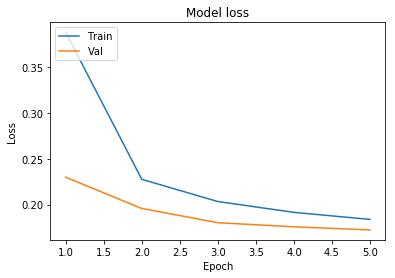

In [50]:
plot_learningCurve(model.history,5)